In [1]:
import csv
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,8)
x=np.linspace(5.0,140.0,140)

In [2]:
flow=np.array([])
ball=np.array([])
with open('E602_SN2-37_Argon_SS.csv', newline='') as csvfile:
    fcsv=csv.reader(csvfile, delimiter=',')
    n=0
    for row in fcsv:
        n+=1
        if n==1: continue 
        flow=np.append(flow,float(row[0]))
        ball=np.append(ball,float(row[1]))

In [3]:
arflowSS_tube=interpolate.interp1d(ball,flow)

In [4]:
ro,cal=np.loadtxt('ARGON_602(E300)_SS_0_PSIG.dat',unpack=True) # sccm
arflowSS_typical=interpolate.interp1d(ro, cal)

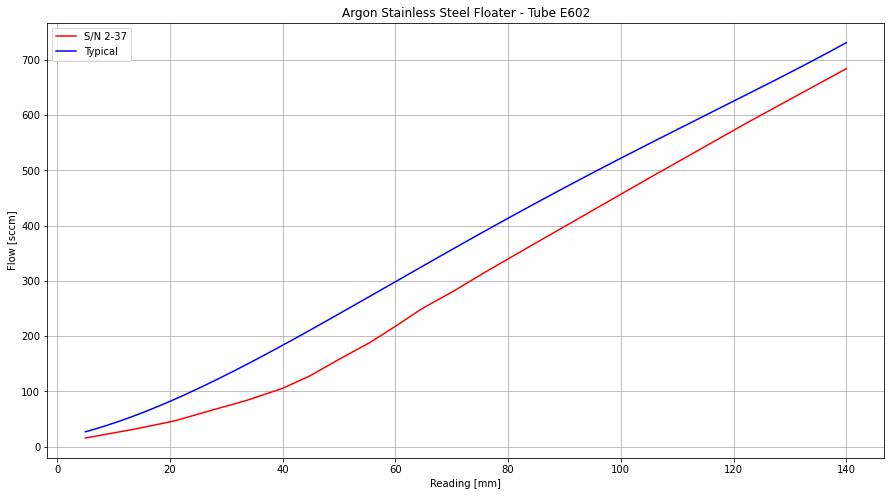

In [5]:
plt.plot(x, arflowSS_tube(x), 'r', label='S/N 2-37')
plt.plot(x, arflowSS_typical(x), 'b', label='Typical')
plt.title('Argon Stainless Steel Floater - Tube E602')
plt.xlabel('Reading [mm]')
plt.ylabel('Flow [sccm]')
plt.grid()
plt.legend(loc='upper left')
plt.show()

In [6]:
flow1=np.array([])
ball1=np.array([])
with open('E602_SN2-9_CarbonDioxide_PY.csv', newline='') as csvfile:
    fcsv=csv.reader(csvfile, delimiter=',')
    n=0
    for row in fcsv:
        n+=1
        if n==1: continue 
        flow1=np.append(flow1,float(row[0]))
        ball1=np.append(ball1,float(row[1]))

In [7]:
co2flowPY_tube1=interpolate.interp1d(ball1,flow1)
print(ball1)

[  4.951  15.655  23.765  33.786  43.911  55.941  65.835  75.952  86.065
  95.952 106.751 116.864 126.863 137.771]


In [8]:
flow2=np.array([])
ball2=np.array([])
with open('E602_SN2-28_CarbonDioxide_PY.csv', newline='') as csvfile:
    fcsv=csv.reader(csvfile, delimiter=',')
    n=0
    for row in fcsv:
        n+=1
        if n==1: continue 
        flow2=np.append(flow2,float(row[0]))
        ball2=np.append(ball2,float(row[1]))

In [9]:
co2flowPY_tube2=interpolate.interp1d(ball2,flow2)
print(ball2)

[ 33.486  39.698  50.479  58.126  66.089  72.83   86.094  99.34  111.914
 126.39  141.322]


In [10]:
ro,cal=np.loadtxt('CARBON_DIOXIDE_602(E300)_GLASS_0_PSIG.dat',unpack=True) # sccm
co2flowPY_typical=interpolate.interp1d(ro, cal)

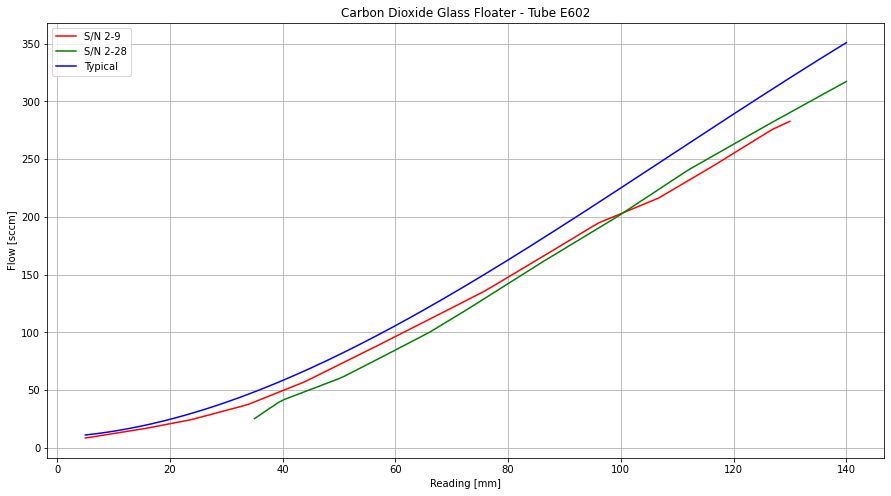

In [11]:
x1=np.linspace(5.0,130.0,130)
x2=np.linspace(35.0,140.0,100)
plt.plot(x1, co2flowPY_tube1(x1), 'r', label='S/N 2-9')
plt.plot(x2, co2flowPY_tube2(x2), 'g', label='S/N 2-28')
plt.plot(x, co2flowPY_typical(x), 'b', label='Typical')
plt.title('Carbon Dioxide Glass Floater - Tube E602')
plt.xlabel('Reading [mm]')
plt.ylabel('Flow [sccm]')
plt.grid()
plt.legend(loc='upper left')
plt.show()